In [4]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


In [5]:
# 1. Load data
df = pd.read_csv('tugas_genap.csv')

print("5 baris data pertama:")
display(df.head())

print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif:")
display(df.describe())

print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


5 baris data pertama:


,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+



Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    2000 non-null   object 
 1   meta_score   2000 non-null   float64
 2   user_score   2000 non-null   float64
 3   platform     2000 non-null   object 
 4   description  1980 non-null   object 
 5   url          2000 non-null   object 
 6   developer    1998 non-null   object 
 7   genre        1999 non-null   object 
 8   type         1571 non-null   object 
 9   rating       1696 non-null   object 
dtypes: float64(2), object(8)
memory usage: 156.4+ KB
None

Statistik deskriptif:


,meta_score,user_score
count,2000.000000,2000.000000
mean,80.854000,76.765000
std,5.179392,10.225804
min,74.000000,12.000000
25%,77.000000,73.000000
50%,80.000000,78.000000
75%,83.000000,84.000000
max,99.000000,92.000000



Jumlah missing values per kolom:
game_name        0
meta_score       0
user_score       0
platform         0
description     20
url              0
developer        2
genre            1
type           429
rating         304
dtype: int64


<Figure size 1400x1000 with 0 Axes>

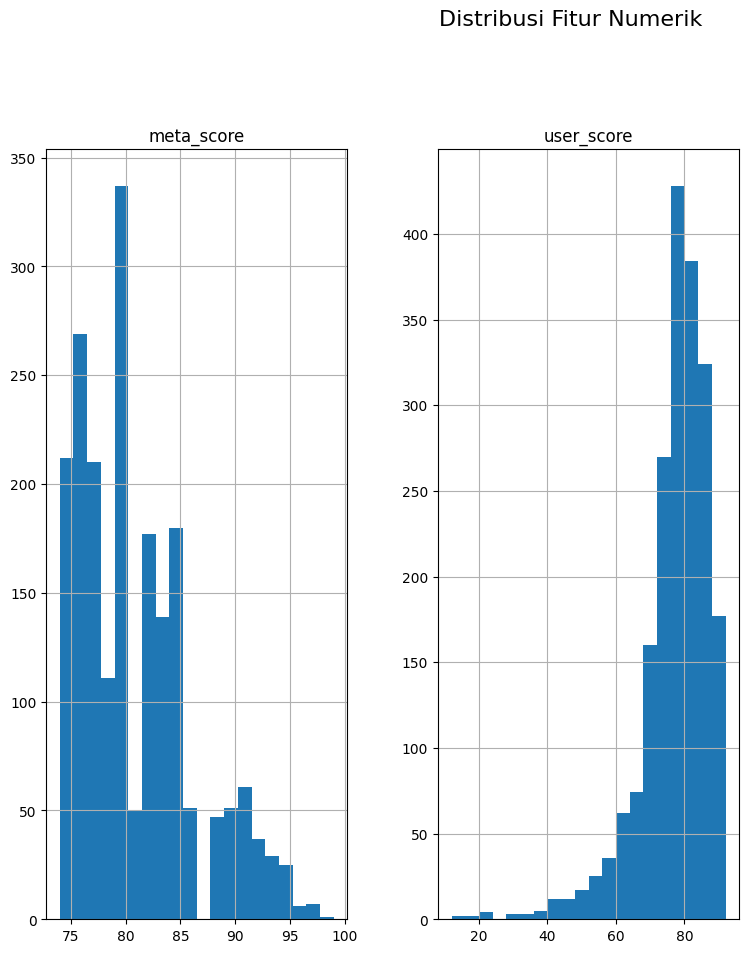

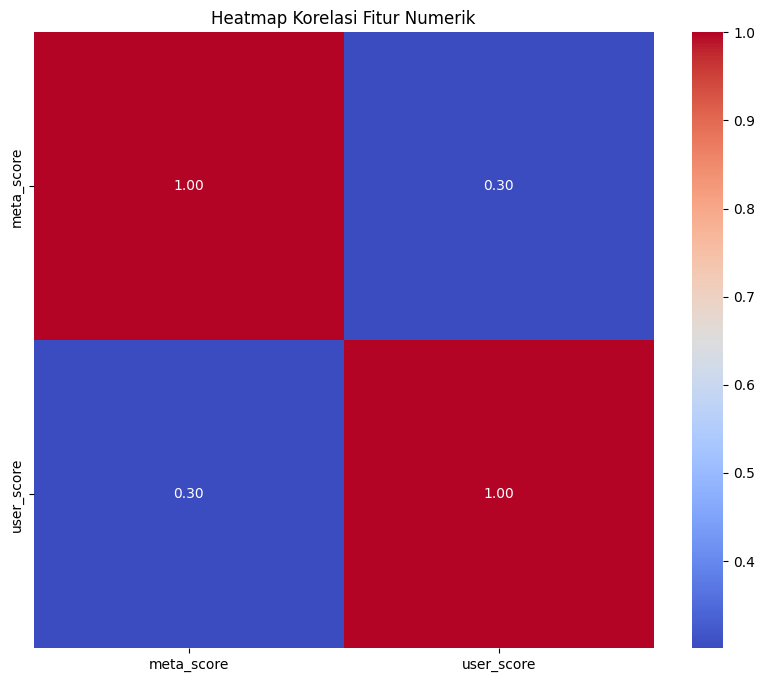

In [6]:
# 2. Visualisasi Data

# Histogram fitur numerik
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(14,10))
df[numerical_features].hist(bins=20, layout=(len(numerical_features)//3+1,3), figsize=(14,10))
plt.suptitle('Distribusi Fitur Numerik', y=1.02, fontsize=16)
plt.show()

# Heatmap korelasi
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

In [7]:
# 3. Persiapan data untuk model rekomendasi

# Ambil fitur numerik sebagai vektor fitur
features = df[numerical_features]

# Standarisasi fitur agar jarak Euclidean optimal
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Hitung matriks jarak Euclidean antar item
distance_matrix = cdist(features_scaled, features_scaled, metric='euclidean')


In [8]:
# 4. Fungsi rekomendasi
def recommend(item_index, distance_matrix, df, top_n=5):
    distances = distance_matrix[item_index]
    nearest_indices = distances.argsort()[1:top_n+1]
    recommended_items = df.iloc[nearest_indices]
    recommended_distances = distances[nearest_indices]
    return recommended_items, recommended_distances

# Contoh rekomendasi untuk item ke-0
item_idx = 0
recommended_items, recommended_distances = recommend(item_idx, distance_matrix, df, top_n=5)

print(f"\nRekomendasi 5 item terdekat untuk item index {item_idx}:")
display(recommended_items)



Rekomendasi 5 item terdekat untuk item index 0:


,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+
5,Halo: Combat Evolved,97.0,87.0,['xbox'],"Enter the mysterious world of Halo, an alien p...",https://www.metacritic.com/game/xbox/halo-comb...,Bungie Software,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",multiplayer,M


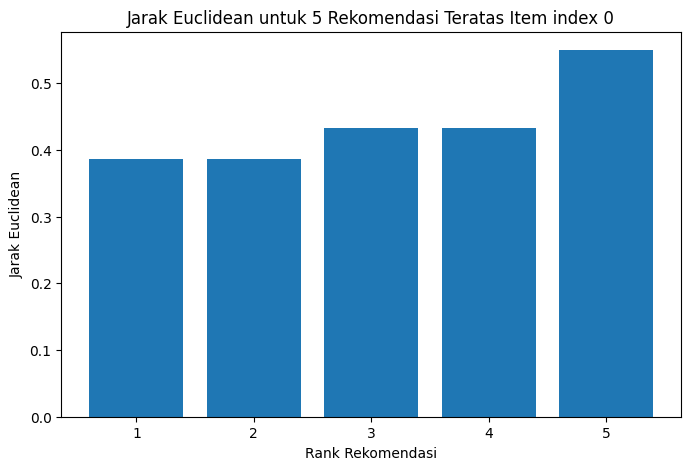

In [9]:
# 5. Evaluasi sederhana: Visualisasi jarak rekomendasi item ke-0
plt.figure(figsize=(8,5))
plt.bar(range(1,6), recommended_distances)
plt.xlabel('Rank Rekomendasi')
plt.ylabel('Jarak Euclidean')
plt.title(f'Jarak Euclidean untuk 5 Rekomendasi Teratas Item index {item_idx}')
plt.show()